# Noise Model Diagnostics: Autocorrelation of the Residuals

This example shows how to use the autocorrelation plots of the residuals to check assumptions of the noise model

Three cases are shown. In the first two, optimisation is used to obtain a best-fit parameter vector in a single output problem. In the first case the noise is correctly specified and in the second case the noise is misspecified. The third case demonstrates the same method in a multiple output problem with Bayesian inference.

## Case 1: Correctly specified noise

For the first example, we will use optimisation to obtain the best-fit parameter vector. See [Optimisation First Example](https://github.com/pints-team/pints/blob/master/examples/optimisation-first-example.ipynb) for more details. We begin with a problem in which the noise is correctly specified: both the data generation and the model use independent Gaussian noise.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4292266    0:00.0
1     12     3906944    0:00.0
2     18     2932905    0:00.0
3     24     1750566    0:00.0
20    126    1272592    0:00.0
40    246    233236.2   0:00.0
60    366    232986.1   0:00.0
80    486    232892.6   0:00.0
100   606    232891.6   0:00.1
120   726    232891.6   0:00.1
140   846    232891.6   0:00.1
160   966    232891.6   0:00.1
180   1086   232891.6   0:00.1
200   1206   232891.6   0:00.1
220   1326   232891.6   0:00.1
240   1446   232891.6   0:00.1
260   1566   232891.6   0:00.1
280   1686   232891.6   0:00.1
300   1806   232891.6   0:00.2
320   1926   232891.6   0:00.2
340   2046   232891.6   0:00.2
360   2166   232891.6   0:00.2
380   2286   232891.6   0:00.2
400   2406   232891.6   0:00.2
420   2526   232891.6   0:00.2
440   2646   232891.6   0:00.2
449   2694   232891.6   0:00.2
Halting:

### Visualisation of the data
After obtaining these parameters, it is useful to visualize the data and the fit.

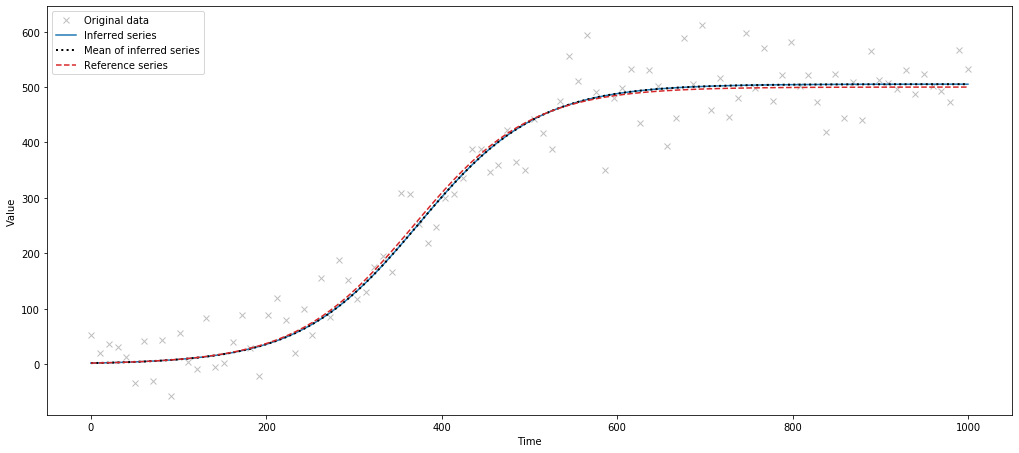

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

### Plotting autocorrelation of the residuals
Next we use the autocorrelation plot of the residuals to evaluate the noise model. This functionality is provided by the `plot_residuals_autocorrelation` method in `pints.residuals_diagnostics`.

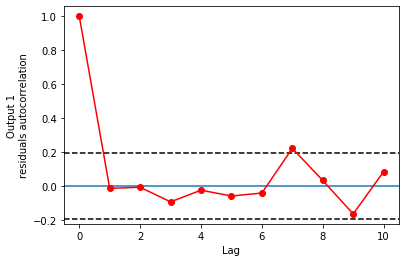

In [3]:
from pints.residuals_diagnostics import plot_residuals_autocorrelation

# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem,
                                     show_confidence=True)

plt.show()


The figure shows no significant autocorrelation in the residuals. Therefore, the assumption of independent noise may be valid.

## Case 2: Incorrectly specified noise

For the next case, we generate data with an AR(1) (first order autoregressive) noise model. However, we deliberately misspecify the model and assume independent Gaussian noise (as before) when fitting the parameters.

In [4]:
import pints.noise

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add AR(1) noise
rho = 0.75
sigma = 50
values = org_values + pints.noise.ar1(rho, sigma, len(org_values))

# Set up the problem and run the optimisation 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      3408639    0:00.0
1     12     1063588    0:00.0
2     18     1063588    0:00.0
3     24     1063588    0:00.0
20    126    468508     0:00.0
40    246    246230.9   0:00.0
60    366    245997.4   0:00.0
80    486    245997.4   0:00.0
100   606    245997.4   0:00.1
120   726    245997.4   0:00.1
140   846    245997.4   0:00.1
160   966    245997.4   0:00.1
180   1086   245997.4   0:00.1
200   1206   245997.4   0:00.1
220   1326   245997.4   0:00.1
240   1446   245997.4   0:00.1
260   1566   245997.4   0:00.1
280   1686   245997.4   0:00.1
300   1806   245997.4   0:00.2
320   1926   245997.4   0:00.2
340   2046   245997.4   0:00.2
360   2166   245997.4   0:00.2
380   2286   245997.4   0:00.2
400   2406   245997.4   0:00.2
420   2526   245997.4   0:00.2
440   2646   245997.4   0:00.2
460   2766   245997.4   0:00.2
474   28

### Visualisation of the data
As before we plot the data and the inferred trajectory.

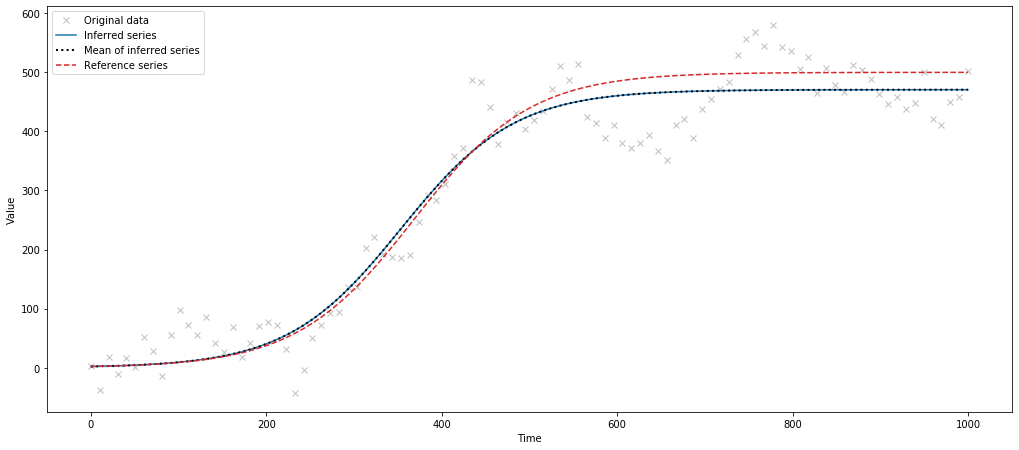

In [5]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

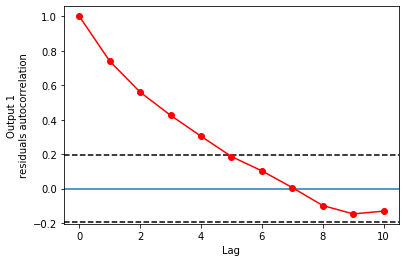

In [6]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem,
                                     show_confidence=True)

plt.show()

Now the autocorrelation plot of the residuals shows high autocorrelation at small lags, which is typical of AR(1) noise. Therefore, this visualisation suggests that the assumption of independent Gaussian noise which we made during inference is invalid.

## Case 3: Multiple output Bayesian inference problem 

The `plot_residuals_autocorrelation` function also works with Bayesian inference and multiple output problems. For the final example, we demonstrate the same strategy in this setting.

For this example, the Lotka-Volterra model is used. See the [Lotka-Volterra example](https://github.com/pints-team/pints/blob/master/examples/toy-model-lotka-volterra.ipynb) for more details. As in Case 1, the true data is generated with independent Gaussian noise.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pints
import pints.toy

model = pints.toy.LotkaVolterraModel()

times = np.linspace(0, 3, 100)
parameters = model.suggested_parameters()
model.set_initial_conditions([2, 2])
org_values = model.simulate(parameters, times)

# Add noise
sigma = 0.05
values = org_values + np.random.normal(0, sigma, org_values.shape)

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 1, 1, 0, 0], [6, 6, 6, 6, 1, 1])
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[4, 1, 2, 3, .1, .1]]*3
mcmc = pints.MCMCController(log_posterior, 3, x0)
mcmc.set_max_iterations(4000)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0         0          0:00.0
2     9      0         0.333     0          0:00.0
3     12     0         0.5       0          0:00.0
20    63     0.429     0.571     0.333      0:00.1
40    123    0.488     0.439     0.341      0:00.1
60    183    0.393     0.361     0.295082   0:00.2
80    243    0.308642  0.321     0.272      0:00.2
100   303    0.257     0.287     0.238      0:00.3
120   363    0.214876  0.256     0.214876   0:00.3
140   423    0.184     0.22      0.199      0:00.4
160   483    0.168     0.193     0.18       0:00.4
180   543    0.160221  0.182     0.160221   0:00.5
Initial phase completed.
200   603    0.149     0.164     0.149      0:00.5
220   663    0.149     0.172     0.14       0:00.6
240   723    0.186722  0.199     0.17       0:00.6
260 

3120  9363   0.211     0.197693  0.233      0:08.0
3140  9423   0.212     0.199     0.232      0:08.1
3160  9483   0.212     0.201     0.233      0:08.2
3180  9543   0.212     0.2       0.233      0:08.2
3200  9603   0.212     0.201     0.232115   0:08.3
3220  9663   0.213     0.201     0.232      0:08.3
3240  9723   0.213     0.203     0.231      0:08.4
3260  9783   0.213     0.204     0.231      0:08.4
3280  9843   0.214     0.205     0.232      0:08.5
3300  9903   0.215     0.205     0.231      0:08.5
3320  9963   0.215     0.205     0.232      0:08.6
3340  10023  0.216     0.207     0.232      0:08.6
3360  10083  0.217     0.208     0.232      0:08.7
3380  10143  0.218     0.208814  0.232      0:08.7
3400  10203  0.219     0.21      0.231      0:08.8
3420  10263  0.219     0.212511  0.231      0:08.8
3440  10323  0.219     0.213     0.231      0:08.9
3460  10383  0.219     0.214     0.231      0:08.9
3480  10443  0.221     0.215     0.231      0:09.0
3500  10503  0.221     0.215367

### Visualisation of the data
As before we plot the data and the inferred trajectories.

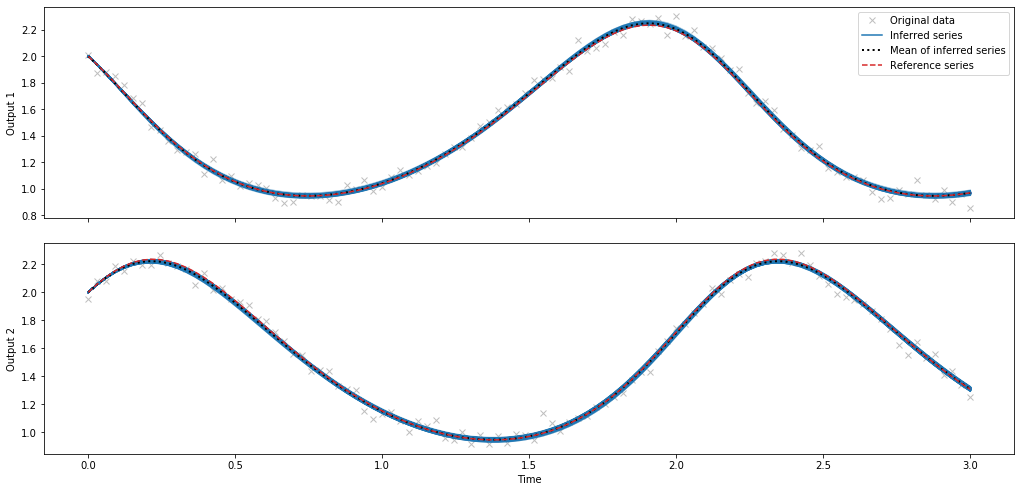

In [8]:
# Get the first MCMC chain
chain1 = chains[0]

# Cut off the burn-in samples
chain1 = chain1[2500:]

fig, ax = pints.plot.series(chain1, problem, ref_parameters=parameters)
fig.set_size_inches(15, 7.5)
plt.show()

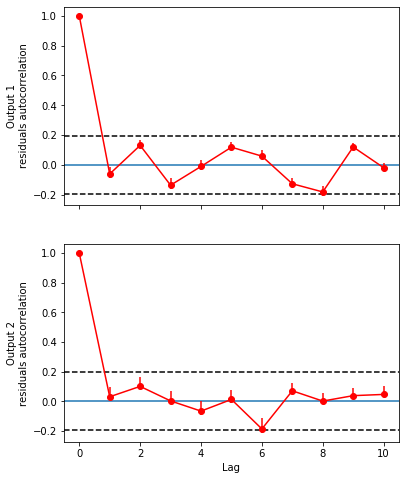

In [9]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(chain1,
                                     problem,
                                     show_confidence=True)

plt.show()

The `plot_residuals_autocorrelation` function generates one residuals plot for each output. Additionally, since Bayesian inference was performed and an MCMC chain was provided to the function, it draws a diagram of the distribution of the autocorrelations at each lag over the MCMC samples. Each dot indicates the median autocorrelation, and the bars show the extent of the 95% posterior interval.

In both outputs, no significant autocorrelation in the residuals is seen, as expected since independent Gaussian noise was used to generate the data.